# London Crime Data

## Introduction

Proyek ini adalah EDA singkat tentang data kejahatan di London dengan Python.

https://www.kaggle.com/datasets/jboysen/london-crime 

## Reading the Data

Data ini mencakup jumlah laporan kejahatan per bulan, 33 wilayah LSOA, 9 kategori kejahatan besar/32 kejahatan kecil dari Januari 2008-Desember 2016.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Mari impor set data London Crime menggunakan metode pandas read_csv().

In [5]:
df_crimes = pd.read_csv('E:\Cool Yeah\Hacktiv8\London Crime Data\Data\london_crime_by_lsoa.csv')

Sekarang mari kita lihat 5 baris teratas dari dataset menggunakan fungsi head().

In [7]:
df_crimes.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Kita juga bisa melihat 5 baris terbawah dari dataset menggunakan fungsi tail().

In [8]:
df_crimes.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Mari kita lihat dimensi dataframe.

In [9]:
df_crimes.shape

(13490604, 7)

Kita dapat melihat bahwa data memiliki 13490604 baris dan 7 kolom. Kita akan mengeksplorasi data lebih lanjut.

## Bagaimana jumlah kriminalitas dari tahun ke tahun?

Pertama-tama kita kelompokkan data berdasarkan tahun. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas pertahunnya dari tahun 2008-2016.

In [10]:
df_year = pd.DataFrame(
    df_crimes.groupby(['year'])['value'].sum()
)
df_year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Sekarang kita akan mencoba untuk memvisualisasi data tersebut. Pertama-tama kita pilih style yang akan kita gunakan. 

In [204]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
mpl.style.use(['ggplot'])

Selanjutnya, kita akan memplot plot garis dengan menambahkan .plot() ke df_year dataframe. Jangan lupa untuk memberi judul, label sumbu x dan y.

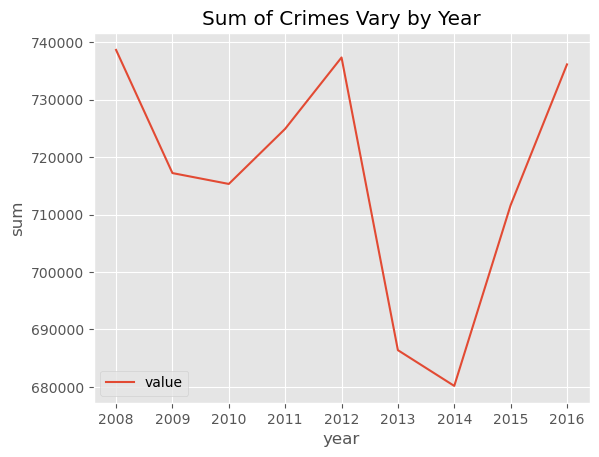

In [32]:
df_year.plot(kind='line')

plt.title('Sum of Crimes Vary by Year')
plt.xlabel('year')
plt.ylabel('sum')

plt.show()

Kita dapat melihat dengan jelas jumlah kriminalitas di Kota London mengalami penurunan pada tahun 2012 dan mulai meningkat kembali pada tahun 2014.

## Bagaimana Jumlah Setiap Kriminalitas Kategori Major dari Tahun ke Tahun?

Pertama-tama kita kelompokkan data berdasarkan year dan major category. Kemudian kita jumlahkan value data tersebut, sehingga kita dapat melihat jumlah kriminalitas pertahunnya dan perkategorinya. Supaya year dan major_category tidak menumpuk, kita dapat menggunakan unstack(). Lalu lakukan transpose() agar kolom year menjadi indexnya.

In [51]:
df_maj_ctg_year = pd.DataFrame(
    df_crimes.groupby(['major_category','year'])['value'].sum().unstack().transpose()
)
df_maj_ctg_year

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Selanjutnya, kita akan memplot plot garis dengan menambahkan .plot() ke df_year_maj_ctg dataframe. Jangan lupa untuk memberi judul, label sumbu x dan y.

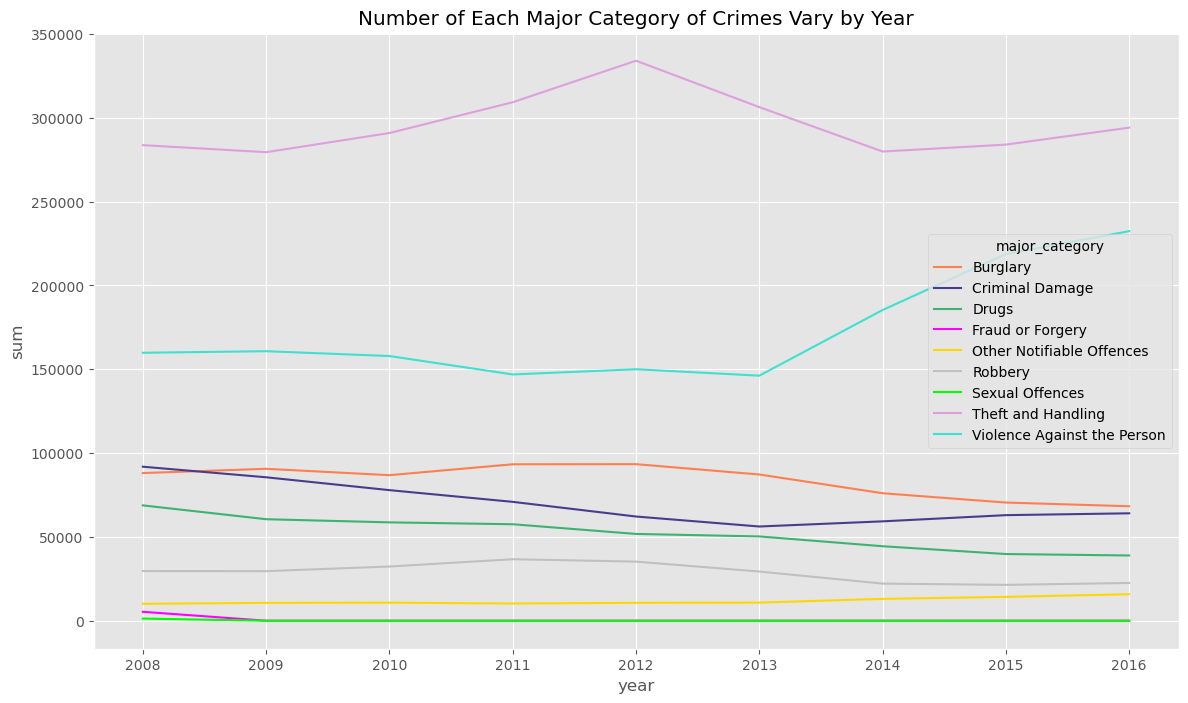

In [52]:
df_maj_ctg_year.plot(
    kind='line', 
    figsize=(14, 8), 
    color=['coral', 'darkslateblue', 'mediumseagreen', 'magenta', 'gold', 'silver', 'lime', 'plum', 'turquoise']
)
plt.title('Number of Each Major Category of Crimes Vary by Year')
plt.ylabel('sum')
plt.xlabel('year')

plt.show()

Seperti yang kita lihat, Theft and Handling menjadi kejahatan yang paling banyak terjadi di Kota London selama bertahun-tahun. Untuk kejahatan Violence Against the Person mengalami peningkatan secara drastis dari tahun 2013. Berbeda dengan Violence Against the Person, kejahatan lainnya tetap stabil selama bertahun-tahun.

## Bagaimana Jumlah Kriminalitas Setiap Tahunnya Berdasarkan Bulan?

In [56]:
df_year_month = pd.DataFrame(
    df_crimes.groupby(['year', 'month'])['value'].sum().unstack().transpose()
)
df_year_month

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,
1,65419,59142,54934,57966,62436,58933,55515,57055,58847
2,62626,54706,55069,54895,56735,55271,51222,53316,56697
3,61343,63482,63629,61282,67537,57590,57669,60096,59167
4,59640,59181,60085,58714,58801,55678,53467,56445,58637
5,62587,62897,62126,62630,64344,56765,56327,61038,63990
6,62290,63116,62632,61822,62281,56839,57039,60760,62262
7,64126,63281,63764,62428,63280,60508,58564,61606,65519
8,59959,58695,59040,59117,62143,57467,55641,58056,62666
9,58414,57847,59731,58640,56912,54924,56933,57564,61412


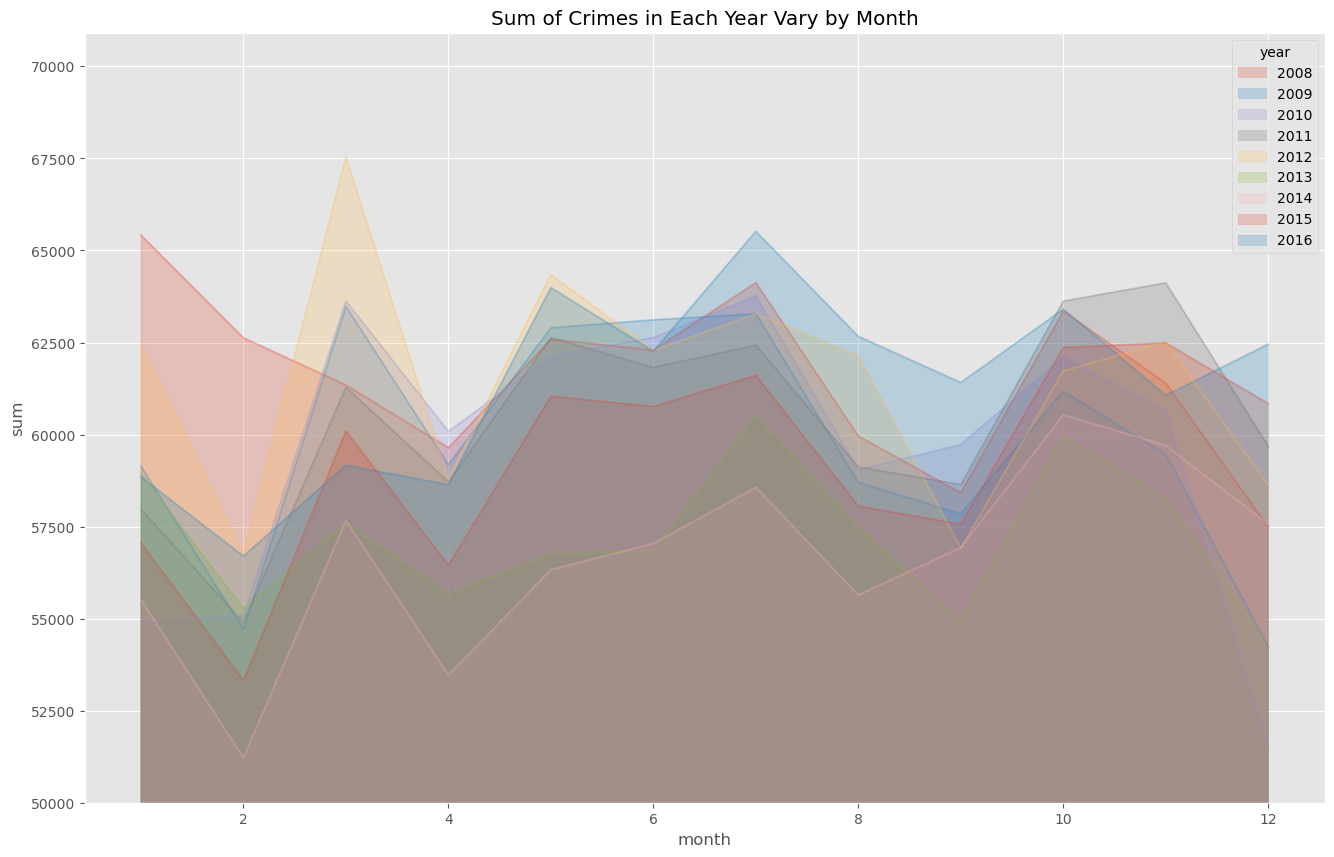

In [57]:
df_year_month.plot(
    kind='area',
    alpha=0.25,
    stacked=False,
    figsize=(16, 10)
)
plt.title('Sum of Crimes in Each Year Vary by Month')
plt.ylabel('sum')
plt.xlabel('month')
plt.ylim(bottom=50000)

plt.show()

## Histogram Jumlah Kriminalitas dari 99 Wilayah di Tahun 2014-2016

In [75]:
sum_by_borough = pd.DataFrame(
    df_crime.groupby(['borough', 'year'])['value'].sum().unstack()
)
sum_by_borough

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
City of London,0,0,0,69,157,110,115,151,178
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127


In [84]:
sum_by_borough[[2014, 2015, 2016]].head()

year,2014,2015,2016
borough,,,
Barking and Dagenham,15426,16346,16741
Barnet,22572,24036,24684
Bexley,11844,11990,12840
Brent,24426,24883,26693
Bromley,19668,20637,20164


In [83]:
count, bin_edges = np.histogram(sum_by_borough[[2014, 2015, 2016]])

print(count)
print(bin_edges)

[ 3  2 16 10 31 24  9  1  0  3]
[  115.   4936.5  9758.  14579.5 19401.  24222.5 29044.  33865.5 38687.
 43508.5 48330. ]


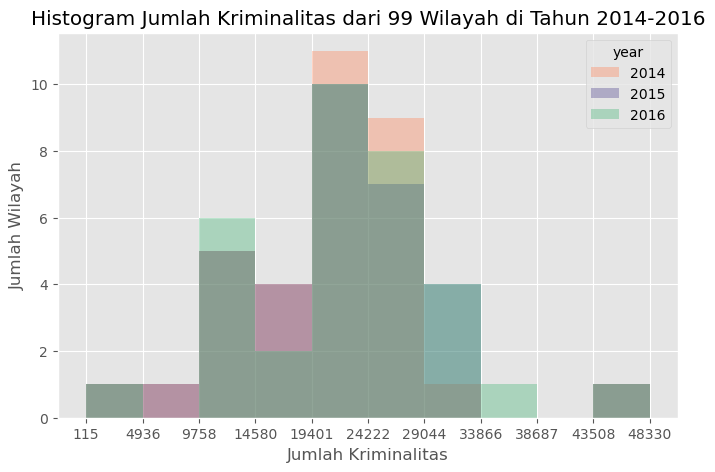

In [92]:
count, bin_edges = np.histogram(sum_by_borough[[2014, 2015, 2016]])

sum_by_borough[[2014, 2015, 2016]].plot(
    kind='hist',
    figsize=(8, 5),
    alpha=0.35,
    xticks=bin_edges,
    color=['coral', 'darkslateblue', 'mediumseagreen']
)

plt.title('Histogram Jumlah Kriminalitas dari 99 Wilayah di Tahun 2014-2016')
plt.ylabel('Jumlah Wilayah')
plt.xlabel('Jumlah Kriminalitas')

plt.show()

## How do the sum of crimes vary by borough?

In [23]:
crimes_by_borough = pd.DataFrame(
    df_crime.groupby(['borough', 'major_category'])['value'].sum()
)
crimes_by_borough

value
borough              major_category                     
Barking and Dagenham Burglary                      18103
                     Criminal Damage               18888
                     Drugs                          9188
                     Fraud or Forgery                205
                     Other Notifiable Offences      2819
...                                                  ...
Westminster          Other Notifiable Offences      6148
                     Robbery                       15752
                     Sexual Offences                  59
                     Theft and Handling           277617
                     Violence Against the Person   71448

[295 rows x 1 columns]

In [115]:
crimes_by_borough.unstack()

value                                            \
major_category         Burglary Criminal Damage    Drugs Fraud or Forgery   
borough                                                                     
Barking and Dagenham    18103.0         18888.0   9188.0            205.0   
Barnet                  36981.0         21024.0   9796.0            175.0   
Bexley                  14973.0         17244.0   7346.0            106.0   
Brent                   28923.0         20569.0  25978.0            157.0   
Bromley                 27135.0         24039.0   8942.0            196.0   
Camden                  27939.0         18482.0  21816.0            123.0   
City of London             15.0            16.0     33.0              NaN   
Croydon                 33376.0         31218.0  19162.0            270.0   
Ealing                  30831.0         25613.0  18591.0            175.0   
Enfield                 30213.0         22487.0  13251.0            132.0   
Greenwich               20966.0         22755.0  10836.0            107.0   
Hackney                 21450.0         17327.0  18144.0            143.0   
Hammersmith and Fulham  17010.0         14595.0  15492.0             91.0   
Haringey                28213.0         22272.0  14563.0            207.0   
Harrow                  19630.0         12724.0   7122.0             92.0   
Havering                21302.0         17252.0   8171.0            179.0   
Hillingdon              26056.0         24485.0  11413.0            223.0   
Hounslow                21026.0         21407.0  13722.0            183.0   
Islington               22207.0         18354.0  16553.0             85.0   
Kensington and Chelsea  14980.0          9839.0  14573.0             85.0   
Kingston upon Thames    10131.0         10610.0   5682.0             65.0   
Lambeth                 30199.0         26136.0  25083.0            137.0   
Lewisham                24871.0         24810.0  16825.0            262.0   
Merton                  16485.0         14339.0   6651.0            111.0   
Newham                  25356.0         24177.0  18389.0            323.0   
Redbridge               26735.0         17543.0  15736.0            284.0   
Richmond upon Thames    16097.0         11722.0   4707.0             37.0   
Southwark               27980.0         24450.0  27381.0            321.0   
Sutton                  13207.0         14474.0   4586.0             57.0   
Tower Hamlets           21510.0         21593.0  23408.0            124.0   
Waltham Forest          25565.0         20459.0  14101.0            236.0   
Wandsworth              25533.0         19630.0   9493.0            161.0   
Westminster             29295.0         20405.0  34031.0            273.0   

                                                                           \
major_category         Other Notifiable Offences  Robbery Sexual Offences   
borough                                                                     
Barking and Dagenham                      2819.0   6105.0            49.0   
Barnet                                    2953.0   7374.0            38.0   
Bexley                                    1999.0   2338.0            22.0   
Brent                                     3711.0  12473.0            39.0   
Bromley                                   2637.0   4868.0            31.0   
Camden                                    3857.0   9286.0            36.0   
City of London                              17.0     24.0             NaN   
Croydon                                   4340.0  12645.0            55.0   
Ealing                                    4406.0   9568.0            52.0   
Enfield                                   3293.0   9059.0            38.0   
Greenwich                                 3598.0   5430.0            56.0   
Hackney                                   3332.0   8975.0            46.0   
Hammersmith and Fulham                    3352.0   5279.0            45.0   
Haringey             

In [14]:
sum_of_maj_ctg = pd.DataFrame(
    df_crime.groupby('major_category')['value'].sum()
)
sum_of_maj_ctg.sort_values(by=['value'], ascending=False, axis=0, inplace=True)
maj_ctg_top5 = sum_of_maj_ctg.head(5)
maj_ctg_top5

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765


In [15]:
df_by_borough = crimes_by_borough.unstack().transpose()
df_by_borough.index

MultiIndex([('value',                    'Burglary'),
            ('value',             'Criminal Damage'),
            ('value',                       'Drugs'),
            ('value',            'Fraud or Forgery'),
            ('value',   'Other Notifiable Offences'),
            ('value',                     'Robbery'),
            ('value',             'Sexual Offences'),
            ('value',          'Theft and Handling'),
            ('value', 'Violence Against the Person')],
           names=[None, 'major_category'])

In [16]:
df_by_borough_2 = df_by_borough.loc[[
    ('value', 'Burglary'),
    ('value', 'Criminal Damage'),
    ('value', 'Drugs'),
    ('value', 'Theft and Handling'),
    ('value', 'Violence Against the Person')
]].transpose()
df_by_borough_2.head()

value                                              \
major_category       Burglary Criminal Damage    Drugs Theft and Handling   
borough                                                                     
Barking and Dagenham  18103.0         18888.0   9188.0            50999.0   
Barnet                36981.0         21024.0   9796.0            87285.0   
Bexley                14973.0         17244.0   7346.0            40071.0   
Brent                 28923.0         20569.0  25978.0            72523.0   
Bromley               27135.0         24039.0   8942.0            69742.0   

                                                  
major_category       Violence Against the Person  
borough                                           
Barking and Dagenham                     43091.0  
Barnet                                   46565.0  
Bexley                                   30037.0  
Brent                                    63178.0  
Bromley                                  46759.0

In [158]:
df_by_borough_2.index

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object', name='borough')

<AxesSubplot:ylabel='borough'>

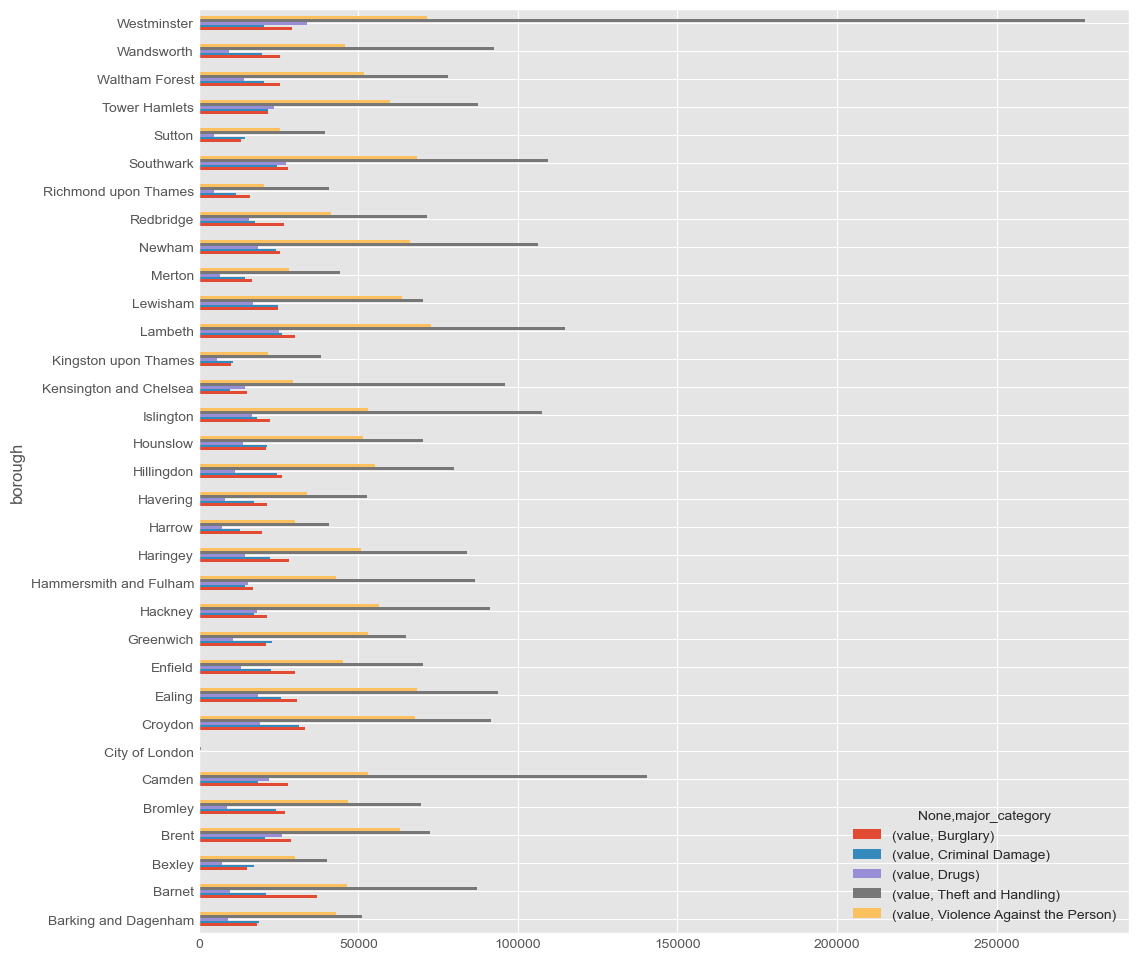

In [166]:
df_by_borough_2.plot(
    kind='barh', figsize=(12, 12)
)

## Which number of major category of crime are most in London?

In [181]:
maj_ctg_in_london = pd.DataFrame(
    df_crime.groupby(['major_category'])['value'].sum()
)
maj_ctg_in_london

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


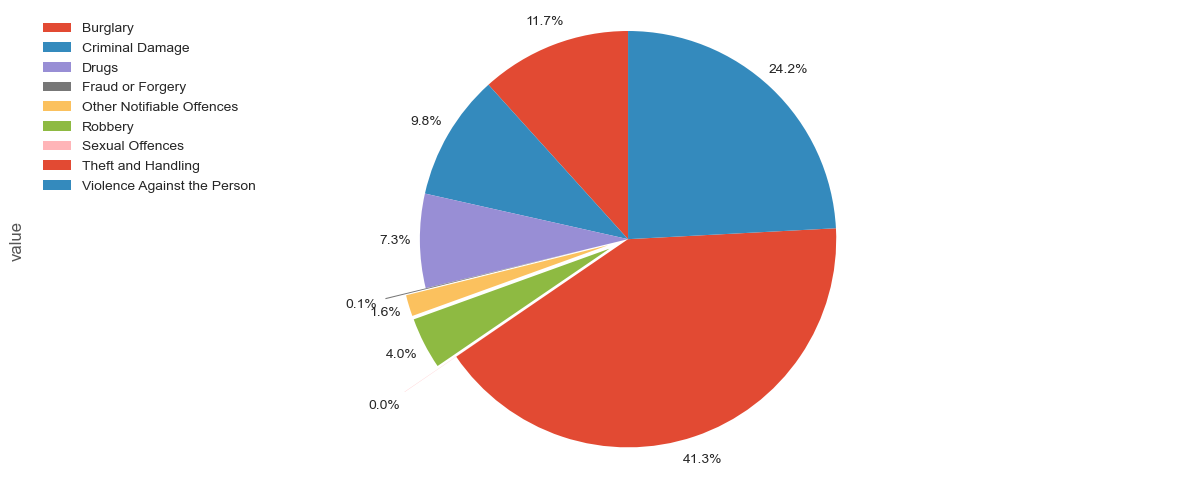

In [188]:
explode_list = [0, 0, 0, 0.2, 0.1, 0.1, 0.3, 0, 0]

maj_ctg_in_london['value'].plot(
    kind='pie', 
    figsize=(15, 6), 
    autopct='%1.1f%%', 
    startangle=90,
    labels=None,
    pctdistance=1.12,
    explode=explode_list
)

plt.axis('equal')
plt.legend(labels=maj_ctg_in_london.index, loc='upper left')
plt.show()

## Box Plot

In [8]:
groupby_borough = pd.DataFrame(
    df_crime.groupby(['borough'])['value'].sum()
)
borough_top5 = groupby_borough.sort_values(['value'], ascending=False).head(5)
borough_top5

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [108]:
borough_top5.index

Index(['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham'], dtype='object', name='borough')

In [117]:
sum_by_borough_t = sum_by_borough.transpose()
sum_by_borough_t.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='year')

In [118]:
df_borough_top5 = sum_by_borough_t[borough_top5.index]
df_borough_top5

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


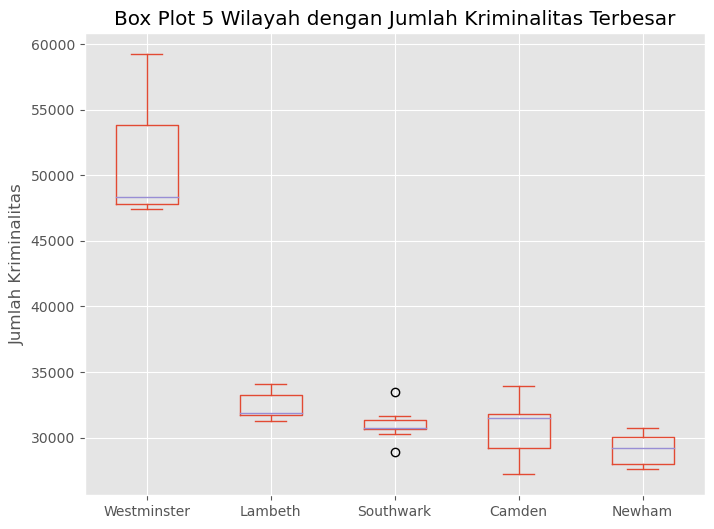

In [120]:
df_borough_top5.plot(
    kind='box',
    figsize=(8, 6)
)

plt.title('Box Plot 5 Wilayah dengan Jumlah Kriminalitas Terbesar')
plt.ylabel('Jumlah Kriminalitas')

plt.show()

In [121]:
df_borough_top5.describe()

borough,Westminster,Lambeth,Southwark,Camden,Newham
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,50558.666667,32464.222222,30978.777778,30571.888889,29113.777778
std,4201.683918,1014.515005,1215.293049,2121.547633,1119.162385
min,47395.000000,31225.000000,28912.000000,27198.000000,27577.000000
25%,47846.000000,31717.000000,30623.000000,29183.000000,28005.000000
50%,48330.000000,31868.000000,30737.000000,31472.000000,29217.000000
75%,53852.000000,33224.000000,31320.000000,31804.000000,30067.000000
max,59226.000000,34071.000000,33470.000000,33956.000000,30728.000000


## Scatter Plots

In [138]:
num_of_crime.index = map(int, num_of_crime.index)

In [131]:
num_of_crime.reset_index(inplace=True)

In [133]:
num_of_crime.columns = ['year', 'total']

In [136]:
num_of_crime

,year,total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


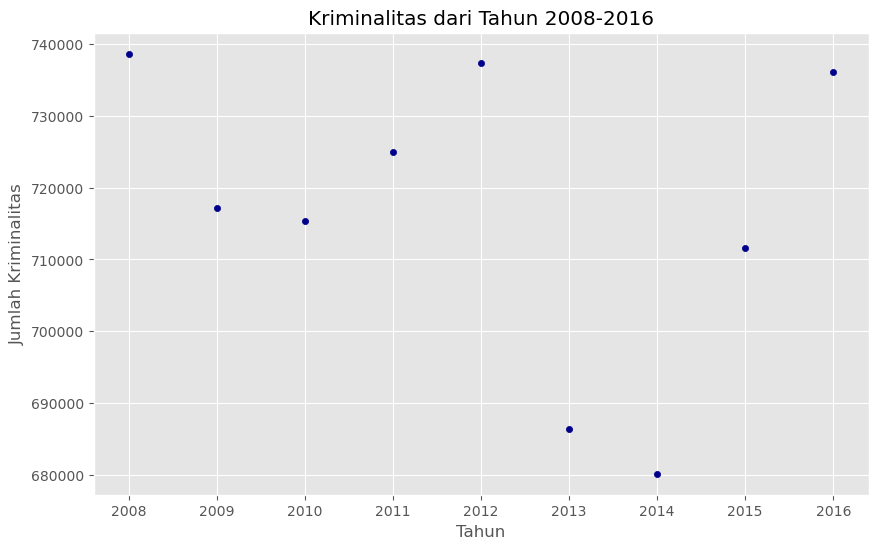

In [140]:
num_of_crime.plot(
    kind='scatter', 
    x='year', 
    y='total', 
    figsize=(10, 6), 
    color='darkblue'
)

plt.title('Kriminalitas dari Tahun 2008-2016')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')

plt.show()

## WordCloud

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
df_crime.minor_category

0           Burglary in Other Buildings
1                        Other violence
2                        Other violence
3           Burglary in Other Buildings
4                     Personal Property
                       ...             
13490599    Criminal Damage To Dwelling
13490600              Personal Property
13490601         Burglary in a Dwelling
13490602              Business Property
13490603                   Wounding/GBH
Name: minor_category, Length: 13490604, dtype: object

In [40]:
df_min_ctg = pd.DataFrame(
    df_crime.groupby('minor_category')['value'].sum()
)

In [42]:
df_min_ctg.sort_values(['value']).head()

,value
minor_category,
Rape,268
Murder,949
Other Sexual,1005
Other Fraud & Forgery,1485
Other Drugs,2998


In [44]:
df_crime[df_crime['minor_category'] == 'Rape'].borough.values

array(['Brent', 'Greenwich', 'Lambeth', ..., 'Hackney', 'Newham',
       'Waltham Forest'], dtype=object)

In [45]:
listToStr = ' '.join([str(elem) for elem in df_crime[df_crime['minor_category'] == 'Rape'].borough.values])

In [20]:
stopwords = set(STOPWORDS)

In [47]:
borough_wc = WordCloud(
    background_color='white',
    max_words=100, 
    stopwords=stopwords
)

borough_wc.generate(listToStr)

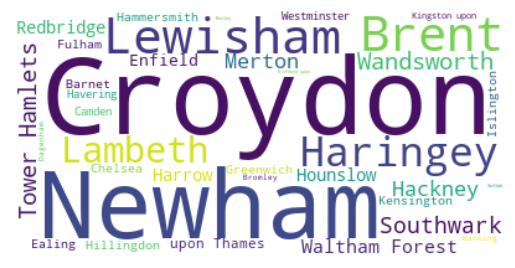

In [48]:
plt.imshow(borough_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Wilayah/kata Croydon yang paling umum

## Map

In [5]:
import folium

In [ ]:
df_crime.

In [9]:
borough_top5

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [10]:
lat = [51.4977836, 51.4605007, 51.5027935, 51.5428636, 51.5300822]
lon = [-0.1522502, -0.1906767, -0.0964928, -0.194445, -0.0307733]

In [11]:
borough_top5['latitude'] = lat
borough_top5['longitude'] = lon

In [12]:
borough_top5

,value,latitude,longitude
borough,,,
Westminster,455028,51.497784,-0.152250
Lambeth,292178,51.460501,-0.190677
Southwark,278809,51.502794,-0.096493
Camden,275147,51.542864,-0.194445
Newham,262024,51.530082,-0.030773


In [56]:
# london latitude and longitude values
latitude = 51.5286417
longitude = -0.1015987

In [16]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)
london_map

In [17]:
incidents = folium.map.FeatureGroup()

for lat, lon, in zip(borough_top5.latitude, borough_top5.longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lon],
            radius=5, 
            color='yellow', 
            fill=True, 
            fill_color='blue', 
            fill_opacity=0.6
        )
    )

london_map.add_child(incidents)

In [30]:
df_borough = pd.DataFrame(
    df_crime.groupby('borough')['value'].sum()
)
df_borough.head(10)

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [31]:
df_borough.reset_index(inplace=True)

In [32]:
df_borough.head(10)

,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


In [60]:
london_geo = r'london_boroughs.json'

london_map = folium.Map(
    location=[latitude, longitude], 
    zoom_start=10, 
    tiles="https://api.mapbox.com/v4/mapbox.streets/{z}/{x}/{y}.png?access_token=mytoken", 
    attr="Mapbox attribution"
)

london_map.choropleth(
    geo_data=london_geo, 
    data=df_borough, 
    columns=['borough', 'value'], 
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2, 
    legend_name='Jumlah Kriminalitas'
)

london_map